# Taylor Series

This is an exposition on Taylor series, loosely following &sect; 1.4 of *Applied Scientific Computing With Python* by Peter R. Turner, Thomas Arildsen, and Kathleen Kavanagh.

The goal here is to stress that we can do rigorous computations in Python even with infinite quantities. However, to do so, we need to combine mathematical arguments, with careful coding.

**Mathematics reviewed:**
* Taylor series
* Remainder formulas

**Programming topics introduced:**
* Alternate assignment operators
* Working with lists

## Programming
### Standard imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

### Assignment operators

We will use some new assignment operators, which make some code easier to read here.

The operators 
* `x += y` is short hand for `x = x+y`. 
* `x -= y` is short hand for `x = x-y`. 
* `x *= y` is short hand for `x = x*y`. 
* `x /= y` is short hand for `x = x/y`.
* `x //= y` is short hand for `x = x//y`.
* `x %= y` is short hand for `x = x%y`.

In [2]:
x = 2
x += 1
x

3

In [3]:
x -= 10
x

-7

In [4]:
x //= -7
x

1

In [5]:
x /= -7
x

-0.14285714285714285

In [6]:
x = 13
x %= 3
x

1

### Working with lists

Lists can be changed. This gives tools that makes them easy to construct.

You can build a short list using square brackets.

In [7]:
l = [1, 2, "dog"]
l

[1, 2, 'dog']

You can add an object to the end of a list with the `append` method.

In [8]:
l.append("cat")
l

[1, 2, 'dog', 'cat']

The following creates a new list `ll` whose entries are given by `2*` the entries in `l`.

In [9]:
ll = []
for x in l:
    ll.append(2*x)
ll

[2, 4, 'dogdog', 'catcat']

Python has a shorthand syntax which does the same thing as the loop above:

In [10]:
ll2 = [2*x for x in l]
ll2

[2, 4, 'dogdog', 'catcat']

An item can be removed with the `del` keyword.

In [11]:
del ll2[1]
ll2

[2, 'dogdog', 'catcat']

If you want to actually use the item you remove, you should use the `pop` method instead.

In [12]:
print("Currently ll2 is {}.".format(ll2))
item = ll2.pop(1)
print("After popping off {}, it has become {}.".format(item, ll2))

Currently ll2 is [2, 'dogdog', 'catcat'].
After popping off dogdog, it has become [2, 'catcat'].


## Power Series 

A *power series* centered at a point $a \in {\mathbb R}$ has the form 
$$\sum_{n=0}^\infty C_n(x-a)^n = C_0 + C_1 (x-a) + C_2 (x-a)^2+\ldots.$$

If a real-valued function $f$ is infinitely differentiable at $a \in {\mathbb R}$, its *Taylor series* is
$$\sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n = f(a) + f'(a) (x-a) + \frac{f''(a)}{2} (x-a)^2+\ldots.$$
A function $f$ is called *analytic at $a$* if equals its Taylor series in a neighborhood of $a$ (i.e., for values $x \in {\mathbb R}$ with $|x-a|<\epsilon$ for some $\epsilon>0$). A function is called *analytic* if it is analytic at every point in its domain.

Most of our favorite functions are analytic including exponential functions, sine, cosine, and logarithms.

## Taylor's Theorem

Taylor's Theorem deals with the question of how closely a truncated Taylor series of a function approximates the function.

The degree $N$ Taylor polynomial of $f$ at $a$ is
$$P_N(x) = \sum_{n=0}^N \frac{f^{(n)}(a)}{n!}(x-a)^n = f(a) + f'(a) (x-a) +\ldots+\frac{f^{(N)}(a)}{N!}(x-a)^N.$$
Then $N$th remainder is 
$$R_N(x) = f(x)-P_N(x).$$
The various Taylor's Theorems give bounds on $|R_N(x)|$, which then can guarantee that $P_N(x)$ is very close to $f(x)$.

The following is the a version of Taylor's Theorem giving the *Lagrange form* of the remainder.

<div style="background: #FFA; border-width: 1px; padding: 1em; ">
**Taylor's Theorem (Lagrange Form)** Let $I \subset {\mathbb R}$ be an open interval, and let $f:I \to {\mathbb R}$ be $N+1$-times differentiable on $I$. Consider the degree $N$ Taylor polynomial $P_N(x)$ of $f$ at $a \in I$. Then for any $x \in I$, there is a $y$ between $a$ and $x$ such that the remainder at $x$ satisfies
$$R_N(x)=\frac{f^{(N+1)}(y)}{(N+1)!} (x-a)^{N+1}.$$
</div>

## Example: Sine

We'll work through the example of the Taylor series of $f(x)=\sin x$. Recall that:
* $f'(x)=\cos x$
* $f''(x)=-\sin x$
* $f'''(x)=-\cos x$
* $f^{(4)}(x)=\sin x$
Thus the derivatives of $f$ repeat periodically with 
$$f^{(k)}(x) = \begin{cases}
\sin x & \text{if $k$ is a multiple of four,} \\
\cos x & \text{if $k-1$ is a multiple of four,} \\
-\sin x & \text{if $k-2$ is a multiple of four,} \\
-\cos x & \text{if $k-3$ is a multiple of four.} \\
\end{cases}$$

Consider the Taylor series at zero. We have
$$f^{(k)}(0) = \begin{cases}
0 & \text{if $k$ is a multiple of four,} \\
1 & \text{if $k-1$ is a multiple of four,} \\
0 & \text{if $k-2$ is a multiple of four,} \\
-1 & \text{if $k-3$ is a multiple of four.} \\
\end{cases}$$
Thus, the Taylor series can be written 
$$\sum_{j=0}^\infty \frac{(-1)^j}{(2j+1)!} x^{2j+1}=x - \frac{x^3}{3!} + \frac{x^5}{5!} - \ldots.$$
Below we write code to evaluate the Taylor polynomial of various degrees.

In [13]:
def sin_polynomial(d):
    assert type(5)==int, "d should be an integer"
    assert d>=0, "d should be non-negative"
    def polynomial(x):
        j = 0
        
        factorial = 1 # will always store j!.
        x_power = 1.0 # will store x^j 
        total = 0.0   # will store P_j(x)

        # The below loop will be started whenever j<d, but
        # because we increase j immediately, total will include
        # the degree d term.
        while j < d:            
            # Increase j
            j += 1
            # Update factorial to j!
            factorial *= j
            # Update x_power to x^j
            x_power *= x
            # The if statements update the value of total
            if j % 4 == 1:
                # value of k-th derivative at zero is 1.
                total += x_power / factorial
            if j % 4 == 3:
                # value of k-th derivative at zero is -1.
                total -= x_power / factorial
        return total
    return polynomial

#### Sanity checks

Note that the degree one Taylor polynomial is just $x$. Let us check that this is correct.

In [14]:
p1 = sin_polynomial(1)

In [15]:
for x in range(10):
    print(p1(x)==x)

True
True
True
True
True
True
True
True
True
True


The degree $3$ Taylor polynomial should be $x-\frac{x^3}{6}$. We will now check that the value at $x=1$ is correct. It should be $5/6$.

In [16]:
p3 = sin_polynomial(3)
p3(1)

0.8333333333333334

Looks good.

## Plotting

In [17]:
x = np.linspace(-5,5,1001)

In [18]:
p1 = sin_polynomial(1)
p3 = sin_polynomial(3)
p5 = sin_polynomial(5)
p7 = sin_polynomial(7)
p9 = sin_polynomial(9)

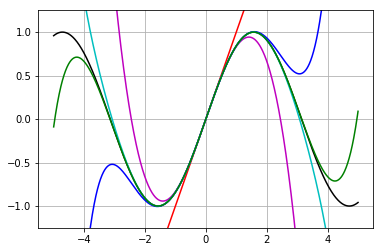

In [19]:
plt.ylim(-1.25,1.25)
plt.plot(x,np.sin(x),"k")
plt.plot(x,p1(x),"r")
plt.plot(x,p3(x),"m")
plt.plot(x,p5(x),"b")
plt.plot(x,p7(x),"c")
plt.plot(x,p9(x),"g")
plt.grid(True)
plt.show()

## Computing to a given accuracy

Suppose we want to find the value of $f(x)=\sin x$ to a given accuracy $\epsilon>0$. So, we want to use a Taylor polynomial $P_N(x)$ of degree $d$ where we know that the remainder $R_N(x)=\sin x-P_N(x)$ satisfies $|R_N(x)|<\epsilon$. We will arrange this using the Lagrange Form of the remainder:
$$R_N(x)=\frac{f^{(N+1)}(y)}{(N+1)!} (x-a)^{N+1}.$$
Observe that because all derivatives of $f$ are sine or cosine waves and $a=0$, we have
$$|R_N(x)| \leq \frac{|x^{N+1}|}{(N+1)!}.$$
We'll call the right-hand quantity `remainder_bound` and compute it as we add terms.

In [20]:
def sin_approx(x, epsilon):
    N = 0
    
    total = 0.0   # will store P_N(x)
    x_power = 1.0 # will store x^N 
    factorial = 1 # will always store N!.
    remainder_bound = x # will store our bound on |R_N(x)|

    while remainder_bound > epsilon:
        N += 1
        # Update the value of factorial.
        factorial *= N
        # Update the value of x_power
        x_power *= x
        # The if statements update total:
        if N % 4 == 1:
            # value of k-th derivative at zero is 1.
            total += x_power / factorial
        if N % 4 == 3:
            # value of k-th derivative at zero is -1.
            total -= x_power / factorial
        # Update our remainder bound
        remainder_bound *= x/(N+1)
    return total

Here is a sanity check that our code works:

In [21]:
epsilon = 0.1
for x in range(1, 20):
    print(abs(m.sin(x)-sin_approx(x,epsilon)))

0.008137651474563135
0.02403590650765164
0.050048579488438744
0.01000205816329136
0.021340225642460298
0.042979820767825194
0.08375167492994784
0.020603739319032477
0.04143188163914263
0.08163689467681345
0.020917170025695153
0.04208498814514716
0.08343161904959817
0.02187309523554315
0.04403900650654835
0.08764193751360028
0.02331770854664461
0.04697616968154583
0.012383260101715143


That looks good. All the numbers printed are less than $0.1$.

We can also check by plotting graphs.

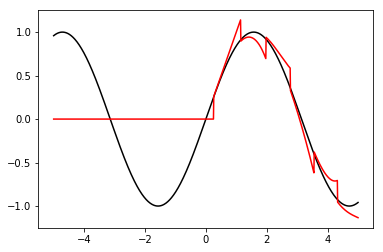

In [22]:
epsilon = 0.25
x = np.linspace(-5,5,1001)
plt.ylim(-1.25,1.25)
plt.plot(x,np.sin(x),"k")
f_approx = np.array([sin_approx(xx, epsilon) for xx in x])
plt.plot(x,f_approx,"r")
plt.show()

Oops. The above makes it clear that we are doing something wrong with negative numbers. 

Revisiting the code, you can find the issue. We forgot to worry about absolute values in our `remainder_bound`. Here is a fix.

In [23]:
def sin_approx(x, epsilon):
    N = 0
    
    total = 0.0   # will store P_N(x)
    x_power = 1.0 # will store x^N 
    factorial = 1 # will always store N!.
    remainder_bound = abs(x) # will store our bound on |R_N(x)|

    while remainder_bound > epsilon:
        N += 1
        # Update the value of factorial.
        factorial *= N
        # Update the value of x_power
        x_power *= x
        # The if statements update total:
        if N % 4 == 1:
            # value of k-th derivative at zero is 1.
            total += x_power / factorial
        if N % 4 == 3:
            # value of k-th derivative at zero is -1.
            total -= x_power / factorial
        # Update our remainder bound
        remainder_bound *= abs(x)/(N+1)
    return total

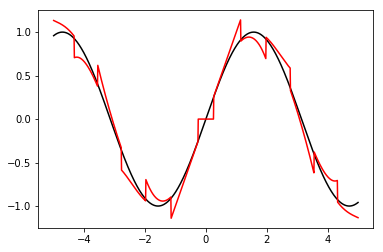

In [24]:
epsilon = 0.25
x = np.linspace(-5,5,1001)
plt.ylim(-1.25,1.25)
plt.plot(x,np.sin(x),"k")
f_approx = np.array([sin_approx(xx, epsilon) for xx in x])
plt.plot(x,f_approx,"r")
plt.show()

The above graph makes it clear that this is a piecewise polynomial function. Higher degree polynomials are needed the further you are from the origin.

With a smaller value of $\epsilon$, the function very closely matches the sine curve.

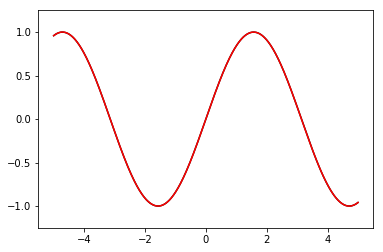

In [25]:
epsilon = 0.001
x = np.linspace(-5,5,1001)
plt.ylim(-1.25,1.25)
plt.plot(x,np.sin(x),"k")
f_approx = np.array([sin_approx(xx, epsilon) for xx in x])
plt.plot(x,f_approx,"r")
plt.show()

In the above computation, we used floating point arithmetic, and there is round off error which we didn't account for. If we wanted rigorous bounds, we could use floating point arithmetic (or some other way to account for round off error).